   age  bank_saving  y
0   22        10000  0
1   45       340000  1
2   12         1000  0
3   56       540000  1
4   37       290000  0
Confusion Matrix : 
 [[1 0]
 [0 1]]
Accuracy :  1.0


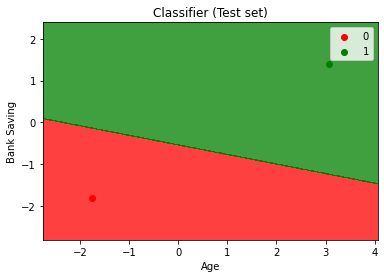

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from matplotlib.colors import ListedColormap 

import warnings
warnings.filterwarnings("ignore")

#Leer el archivo de Excel y vea sus primeras 5 filas.
df = pd.read_excel("datasets/reg-logistic.xlsx") 
print (df.head())

#Dividir el conjunto de datos en una variable independiente y dependiente.
x = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values

# Dividiendo los datos en datos de prueba y de tren.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#Estandarizar los datos para que las variaciones en el número se vuelvan normales.
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)  
x_test = sc_x.transform(x_test)

#Adaptación del conjunto de entrenamiento al modelo.
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)

#Hacer la predicción con el clasificador.
y_pred = classifier.predict(x_test)

#Genere la matriz de confusión.
conf_matrix = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", conf_matrix)

#Verificar la precisión del modelo logístico.
print ("Accuracy : ", accuracy_score(y_test, y_pred))

#Trazar el modelo de clasificación binaria.
X_set, y_set = x_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                color = ListedColormap(('red', 'green'))(i), label = j) 
      
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Bank Saving') 
plt.legend() 
plt.show()